In [6]:
import pandas as pd
import glob
import os

In [7]:
data_path = ".../data/atp1_2000-2024/"

In [8]:
data_folder = "../data/atp1_2000-2024"

all_files = os.listdir(data_folder)

train_files = [f for f in all_files if f.endswith(".csv") and "2023" not in f and "2024" not in f]

train_paths = [os.path.join(data_folder, f) for f in train_files]

print("✅ ：", len(train_paths))
print("：", train_paths[:3])

✅ ： 23
： ['../data/atp1_2000-2024\\atp_matches_2000.csv', '../data/atp1_2000-2024\\atp_matches_2001.csv', '../data/atp1_2000-2024\\atp_matches_2002.csv']


In [9]:
# Load and concatenate all training CSV files
train_dfs = [pd.read_csv(f) for f in train_paths]
train_df = pd.concat(train_dfs, ignore_index=True)

print("✅ Combined training data shape:", train_df.shape)
train_df.head()

✅ Combined training data shape: (68844, 49)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,...,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,...,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,...,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,...,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,...,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0


In [10]:
# Show all column names
print("🔍 Columns:", train_df.columns.tolist())

# Show top 10 columns with the most missing values
missing = train_df.isnull().sum().sort_values(ascending=False)
print("🔧 Top 10 missing value columns:")
print(missing.head(10))

🔍 Columns: ['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']
🔧 Top 10 missing value columns:
winner_entry    60288
loser_entry     54835
loser_seed      53132
winner_seed     40268
minutes          7704
l_1stIn          6289
l_svpt           6289
l_ace            6289
l_df             6289
w_1stWon         6289
dtype: int64


In [11]:
train_df = train_df.drop(columns=['winner_entry', 'loser_entry'])
# Fill missing seeds with -1
train_df['winner_seed'] = train_df['winner_seed'].fillna(-1)
train_df['loser_seed'] = train_df['loser_seed'].fillna(-1)

# Fill match duration (minutes) with median
train_df['minutes'] = train_df['minutes'].fillna(train_df['minutes'].median())

# Fill match stats (ace, double faults, etc.) with 0 or median
stats_cols = ['w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
              'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
              'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
              'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced']

train_df[stats_cols] = train_df[stats_cols].fillna(0)

# Fill player ranking with median
train_df['winner_rank'] = train_df['winner_rank'].fillna(train_df['winner_rank'].median())
train_df['loser_rank'] = train_df['loser_rank'].fillna(train_df['loser_rank'].median())

# Fill player height with median
train_df['winner_ht'] = train_df['winner_ht'].fillna(train_df['winner_ht'].median())
train_df['loser_ht'] = train_df['loser_ht'].fillna(train_df['loser_ht'].median())

# Fill rank points (optional features)
train_df['winner_rank_points'] = train_df['winner_rank_points'].fillna(0)
train_df['loser_rank_points'] = train_df['loser_rank_points'].fillna(0)

# Fill remaining minor fields
train_df['winner_age'] = train_df['winner_age'].fillna(train_df['winner_age'].median())
train_df['loser_hand'] = train_df['loser_hand'].fillna("U")  # unknown



In [7]:
print("🔍 Remaining missing values:")
print(train_df.isnull().sum().sort_values(ascending=False).head(10))


🔍 Remaining missing values:
tourney_id       0
tourney_name     0
surface          0
draw_size        0
tourney_level    0
tourney_date     0
match_num        0
winner_id        0
winner_seed      0
winner_name      0
dtype: int64


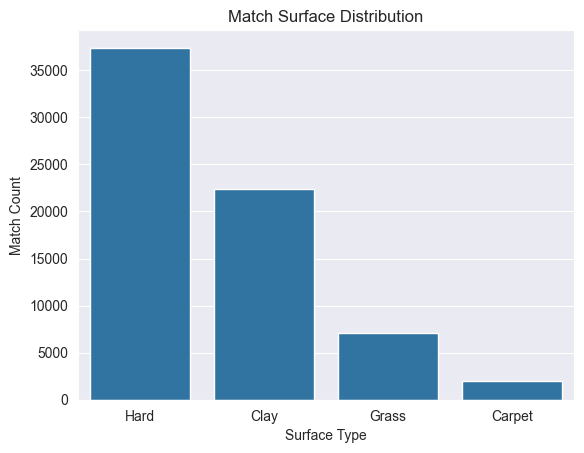

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot surface distribution
sns.countplot(data=train_df, x='surface')
plt.title("Match Surface Distribution")
plt.xlabel("Surface Type")
plt.ylabel("Match Count")
plt.show()


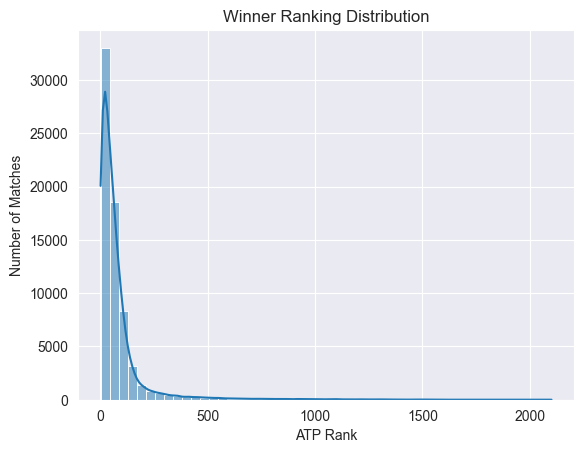

In [13]:
sns.histplot(train_df['winner_rank'], bins=50, kde=True)
plt.title("Winner Ranking Distribution")
plt.xlabel("ATP Rank")
plt.ylabel("Number of Matches")
plt.show()


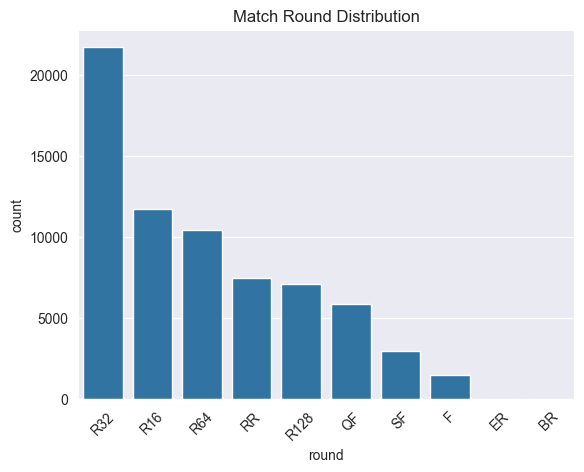

In [14]:
sns.countplot(data=train_df, x='round', order=train_df['round'].value_counts().index)
plt.title("Match Round Distribution")
plt.xticks(rotation=45)
plt.show()


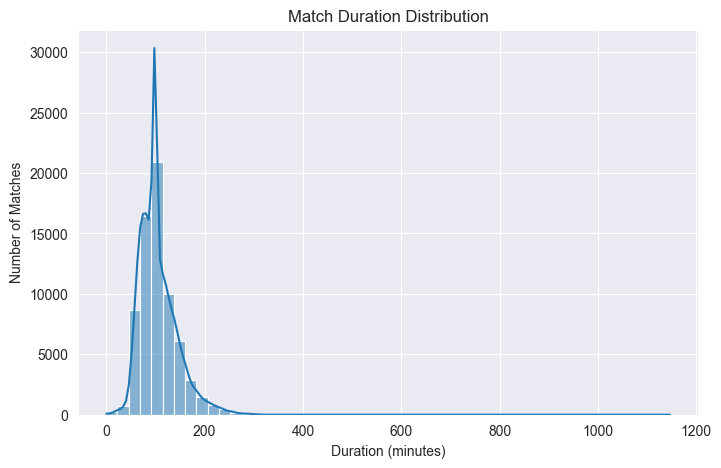

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['minutes'].dropna(), bins=50, kde=True)
plt.title("Match Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Matches")
plt.show()


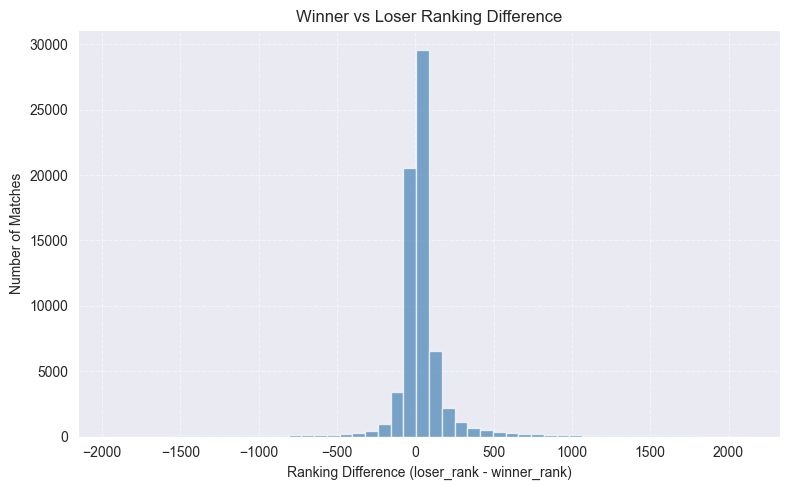

In [16]:
# Compute ranking difference
train_df['rank_diff'] = train_df['loser_rank'] - train_df['winner_rank']

# Plot the distribution
plt.figure(figsize=(8, 5))
plt.hist(train_df['rank_diff'].dropna(), bins=50, color='steelblue', alpha=0.7)
plt.title("Winner vs Loser Ranking Difference")
plt.xlabel("Ranking Difference (loser_rank - winner_rank)")
plt.ylabel("Number of Matches")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


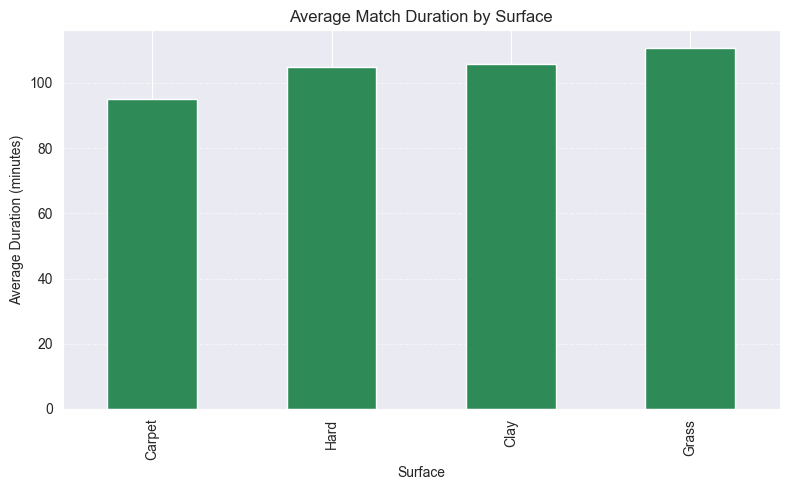

In [17]:
# Group by surface and compute average match duration
avg_duration_by_surface = train_df.groupby('surface')['minutes'].mean().sort_values()

# Bar plot
avg_duration_by_surface.plot(kind='bar', color='seagreen', figsize=(8, 5))
plt.title("Average Match Duration by Surface")
plt.xlabel("Surface")
plt.ylabel("Average Duration (minutes)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


📊 Correlation with winner_is_higher_ranked:
rank_points_diff      0.490511
ranking_diff          0.459713
winner_rank_points    0.316203
loser_rank            0.236957
age_diff              0.056011
height_diff           0.042894
winner_age            0.040104
winner_ht             0.028785
loser_ht             -0.030676
loser_age            -0.035443
winner_rank          -0.308607
loser_rank_points    -0.313418
Name: winner_is_higher_ranked, dtype: float64


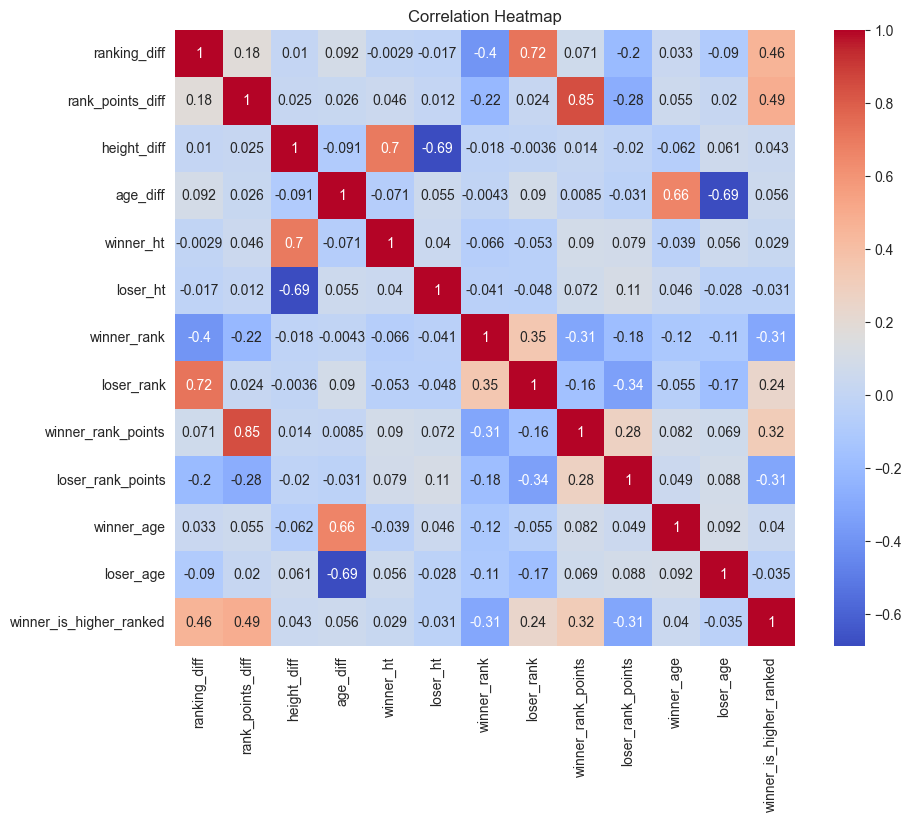


🎾 Surface win rate (higher-ranked player wins):
surface
Carpet    0.623345
Clay      0.643384
Grass     0.652754
Hard      0.655623
Name: winner_is_higher_ranked, dtype: float64


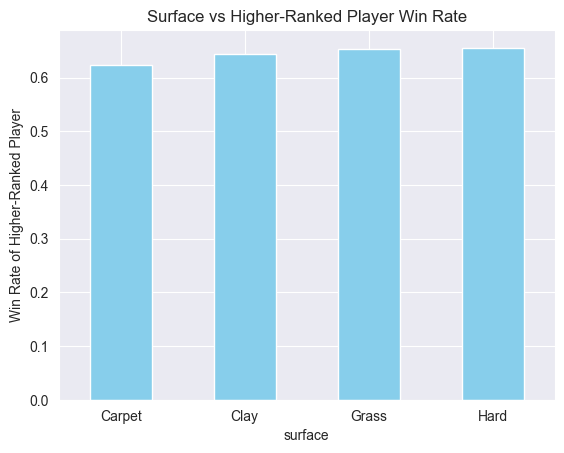

In [18]:
# Create the target label: whether the winner has a higher rank (i.e., lower number)
train_df['winner_is_higher_ranked'] = (train_df['winner_rank'] < train_df['loser_rank']).astype(int)

# Create some useful features (example)
train_df['ranking_diff'] = train_df['loser_rank'] - train_df['winner_rank']
train_df['rank_points_diff'] = train_df['winner_rank_points'] - train_df['loser_rank_points']
train_df['height_diff'] = train_df['winner_ht'] - train_df['loser_ht']
train_df['age_diff'] = train_df['winner_age'] - train_df['loser_age']

# Select numeric features
numeric_features = [
    'ranking_diff', 'rank_points_diff', 'height_diff', 'age_diff',
    'winner_ht', 'loser_ht',
    'winner_rank', 'loser_rank',
    'winner_rank_points', 'loser_rank_points',
    'winner_age', 'loser_age'
]

# Calculate Pearson correlation with the target variable
correlations = train_df[numeric_features + ['winner_is_higher_ranked']].corr()
target_corr = correlations['winner_is_higher_ranked'].drop('winner_is_higher_ranked')
print("📊 Correlation with winner_is_higher_ranked:")
print(target_corr.sort_values(ascending=False))

# Plot heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlations[numeric_features + ['winner_is_higher_ranked']], annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Optional: analyze categorical feature 'surface'
surface_winrate = train_df.groupby('surface')['winner_is_higher_ranked'].mean()
print("\n🎾 Surface win rate (higher-ranked player wins):")
print(surface_winrate)

# Optional bar plot
surface_winrate.plot(kind='bar', color='skyblue')
plt.ylabel('Win Rate of Higher-Ranked Player')
plt.title('Surface vs Higher-Ranked Player Win Rate')
plt.xticks(rotation=0)
plt.show()

In [21]:
# Ensure output directory exists
current_dir = os.getcwd()
output_dir = os.path.join(current_dir, 'output')
os.makedirs(output_dir, exist_ok=True)

# Feature engineering
train_df['ranking_diff'] = train_df['loser_rank'] - train_df['winner_rank']
train_df['rank_points_diff'] = train_df['winner_rank_points'] - train_df['loser_rank_points']
train_df['height_diff'] = train_df['winner_ht'] - train_df['loser_ht']
train_df['age_diff'] = train_df['winner_age'] - train_df['loser_age']

# Target variable
train_df['winner_is_higher_ranked'] = (train_df['winner_rank'] < train_df['loser_rank']).astype(int)

# Drop missing values
train_df = train_df.dropna(subset=[
    'winner_rank', 'loser_rank',
    'winner_rank_points', 'loser_rank_points',
    'winner_ht', 'loser_ht',
    'winner_age', 'loser_age'
])

# Save cleaned dataset
output_path = os.path.join(output_dir, 'cleaned_dataset.csv')
train_df.to_csv(output_path, index=False)
print(f"✅ Cleaned dataset saved to {output_path}")


✅ Cleaned dataset saved to C:\Users\32050\Desktop\kaggle\PythonProject\src\output\cleaned_dataset.csv
